In [212]:
%matplotlib inline
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import color_sequences as cs
import glob

YEAR = 2024

In [213]:
paths = glob.glob(f'data\\{YEAR}\\*.csv')
data = pd.concat((pd.read_csv(f) for f in paths), ignore_index=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1052 entries, 0 to 1051
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Document Title          1052 non-null   object 
 1   Authors                 985 non-null    object 
 2   Author Affiliations     981 non-null    object 
 3   Publication Title       1052 non-null   object 
 4   Date Added To Xplore    1052 non-null   object 
 5   Publication Year        1052 non-null   int64  
 6   Volume                  1052 non-null   int64  
 7   Issue                   1052 non-null   int64  
 8   Start Page              1052 non-null   object 
 9   End Page                1052 non-null   object 
 10  Abstract                999 non-null    object 
 11  ISSN                    1052 non-null   object 
 12  ISBNs                   0 non-null      float64
 13  DOI                     1052 non-null   object 
 14  Funding Information     857 non-null    

In [214]:
data.dropna(how='all', axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1052 entries, 0 to 1051
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Document Title          1052 non-null   object 
 1   Authors                 985 non-null    object 
 2   Author Affiliations     981 non-null    object 
 3   Publication Title       1052 non-null   object 
 4   Date Added To Xplore    1052 non-null   object 
 5   Publication Year        1052 non-null   int64  
 6   Volume                  1052 non-null   int64  
 7   Issue                   1052 non-null   int64  
 8   Start Page              1052 non-null   object 
 9   End Page                1052 non-null   object 
 10  Abstract                999 non-null    object 
 11  ISSN                    1052 non-null   object 
 12  DOI                     1052 non-null   object 
 13  Funding Information     857 non-null    object 
 14  PDF Link                1052 non-null   

In [215]:
data = data[['Authors', 'Author Affiliations', 'Publication Year', 'Funding Information', 'Author Keywords', 'IEEE Terms']]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1052 entries, 0 to 1051
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Authors              985 non-null    object
 1   Author Affiliations  981 non-null    object
 2   Publication Year     1052 non-null   int64 
 3   Funding Information  857 non-null    object
 4   Author Keywords      973 non-null    object
 5   IEEE Terms           978 non-null    object
dtypes: int64(1), object(5)
memory usage: 49.4+ KB


In [216]:
data.dropna(subset=['Authors', 'Author Affiliations'], inplace=True)
data.reset_index(drop=True, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Authors              981 non-null    object
 1   Author Affiliations  981 non-null    object
 2   Publication Year     981 non-null    int64 
 3   Funding Information  857 non-null    object
 4   Author Keywords      973 non-null    object
 5   IEEE Terms           978 non-null    object
dtypes: int64(1), object(5)
memory usage: 46.1+ KB


In [217]:
data.to_csv(f'data\\{YEAR}\\aggregate\\combined.csv', encoding='utf-8', index=False)
data.head(5)

,Authors,Author Affiliations,Publication Year,Funding Information,Author Keywords,IEEE Terms
0,K. S. Nikita,"School of Electrical and Computer Engineering,...",2024,NaN,NaN,NaN
1,B. M. Notaroš; F. P. Andriulli; H. Bagci,Department of Electrical and Computer Engineer...,2024,NaN,NaN,Special issues and sections;Electromagnetics;C...
2,M. Kalfa; Ö. Ergül; V. B. Erturk,Department of Electrical and Electronics Engin...,2024,NaN,Error analysis;low-frequency breakdown (LFB);m...,MLFMA;Arithmetic;Green's function methods;Test...
3,G. -Y. Zhu; W. -D. Li; W. E. I. Sha; H. -X. Zh...,"State Key Laboratory of Millimeter Waves, Sout...",2024,Fundamental Research Funds for the Central Uni...,Electrically large problems;fast multipole alg...,Manganese;Complexity theory;Physics;Kernel;Heu...
4,P. Ylä-Oijala; M. Kuosmanen; H. Wallén,"Department of Electronics and Nanoengineering,...",2024,NaN,Characteristic mode analysis;computational ele...,Eigenvalues and eigenfunctions;Surface impedan...


In [218]:
countries = []

# with open('auth_aff.txt', 'w', encoding='utf-8') as f:
largest = [0, 0]
for i in range(data.shape[0]):
    authors = data ['Authors'][i].split('; ')
    affiliations = data['Author Affiliations'][i].split('; ')
    largest = [max([largest[0], len(authors)]), i if largest[0] < len(authors) else largest[1]]
    for author, aff in zip(authors, affiliations, strict=True):
        # f.write(f'{author}: {aff}\n')
        if aff == 'NA':
            print(author)
        countries.append(aff.split(', ')[-1])

B. Zakeri
M. Bodehou
G. Monnoyer
M. Drouguet
K. Alkhalifeh
L. Vandendorpe
C. Craeye


In [219]:
countries = pd.Series(countries, dtype=str)
countries = countries.replace("Republic of Korea", "South Korea")
countries = countries.replace("Korea", "South Korea")
countries = countries.replace("United Arab Emirates", "UAE")
countries = countries.replace("Türkiye", "Turkey")
countries = countries.replace("Türkey", "Turkey")
countries = countries.replace("Hong Kong SAR", "Hong Kong")
countries = countries.replace("Netherlands", "The Netherlands")
countries = countries.replace("SAR", "SAR China")
countries = countries.replace("U.K", "U.K.")
countries = countries.replace("China,", "China")
countries = countries.replace("P. R. China", "China")
print(countries.info())
countries = countries[countries != 'NA']
print(countries.info())
counts = countries.value_counts()
# counts = counts[counts >= 10]
print(counts)
labels = list(counts.keys())
values = list(counts.values)

<class 'pandas.core.series.Series'>
RangeIndex: 4534 entries, 0 to 4533
Series name: None
Non-Null Count  Dtype 
--------------  ----- 
4534 non-null   object
dtypes: object(1)
memory usage: 35.6+ KB
None
<class 'pandas.core.series.Series'>
Index: 4527 entries, 0 to 4533
Series name: None
Non-Null Count  Dtype 
--------------  ----- 
4527 non-null   object
dtypes: object(1)
memory usage: 70.7+ KB
None
China              2836
USA                 222
Italy               169
South Korea         119
Canada              111
U.K.                109
Spain               102
France               95
Sweden               69
Denmark              66
Australia            61
The Netherlands      59
Japan                54
Finland              53
Germany              41
India                40
Singapore            36
Hong Kong            30
Belgium              27
Greece               24
Iran                 23
Czech Republic       20
Turkey               15
Portugal             13
Saudi Arabia       

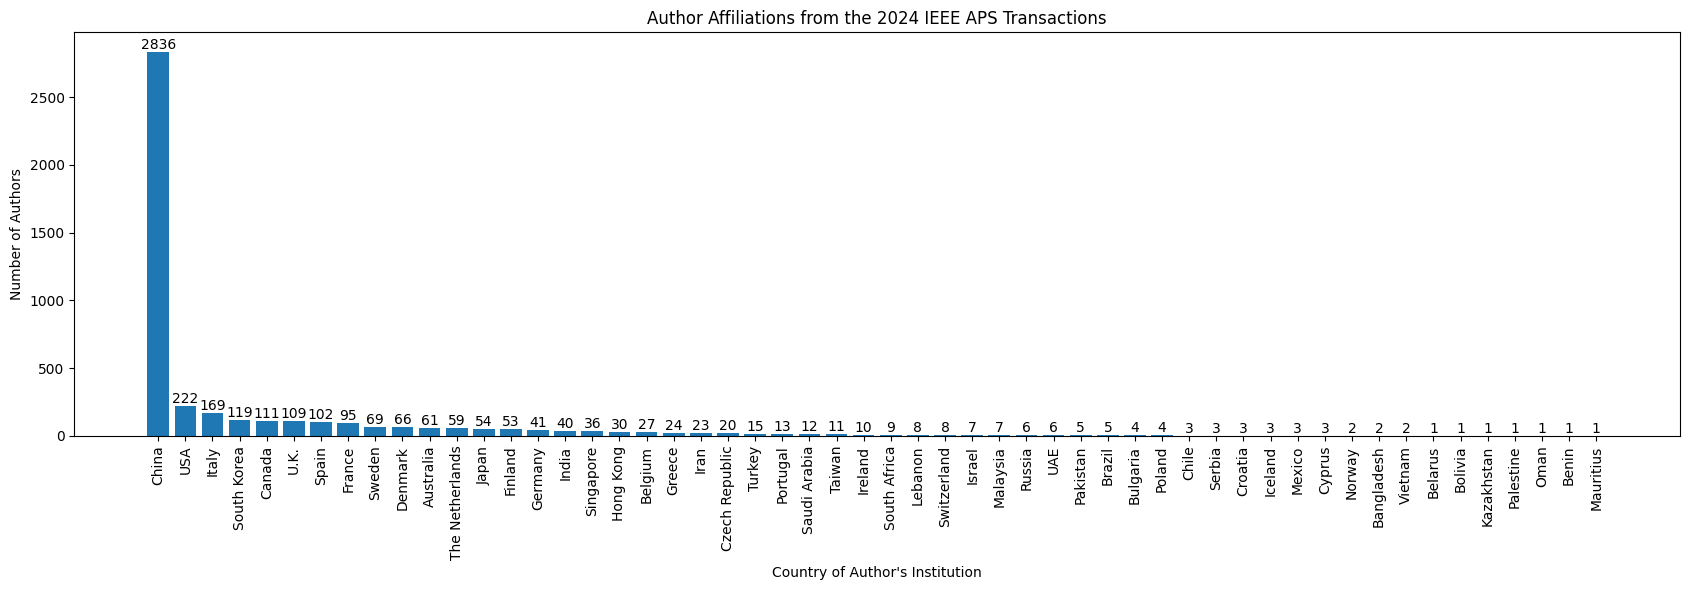

In [220]:
fig, ax = plt.subplots(figsize=(17, 6))
bar_cont = ax.bar(labels, values)
# ax.set(ylim=(0, 1999))
plt.xlabel('Country of Author\'s Institution')
plt.ylabel('Number of Authors')
plt.title(f'Author Affiliations from the {YEAR} IEEE APS Transactions')
plt.xticks(rotation=90)
ax.bar_label(bar_cont)
plt.tight_layout()
plt.savefig(f'figures\\{YEAR}\\{YEAR}_authors_by_country.png', bbox_inches='tight')
plt.show()

In [221]:
super_counts = counts[counts >= 75]
full = counts.sum()
filtered = super_counts.sum()

super_counts['All Other Countries'] = full - filtered

labels = list(super_counts.keys())
values = list(super_counts.values)


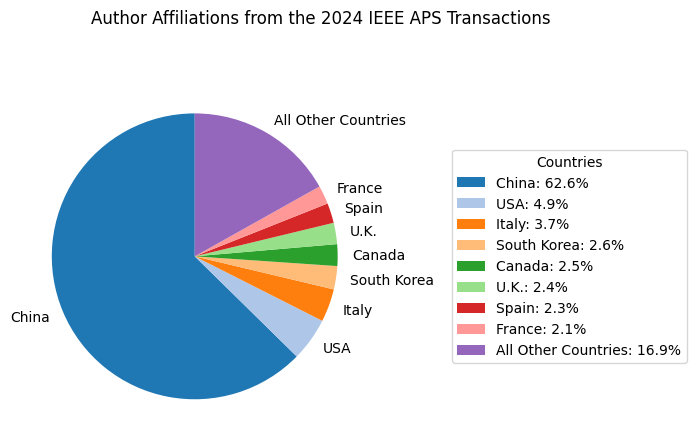

In [222]:

fig, ax = plt.subplots()
wedges, texts = ax.pie(values, labels=labels, startangle=90, colors=cs['tab20'])
percent = [f'{label}: {value/sum(values) * 100:.1f}%' for label, value in zip(labels, values, strict=True)]
ax.legend(wedges, percent, title='Countries', loc='center left', bbox_to_anchor=(1.2, 0, 0.5, 1))
fig.suptitle(f'Author Affiliations from the {YEAR} IEEE APS Transactions')
plt.tight_layout()
plt.savefig(f'figures\\{YEAR}\\{YEAR}_authors_PIE.png', bbox_inches='tight')
plt.show()